# Feature Engineering für eine Drohnen Fernsteuerung, die mit einem MPU6050 ausgestattet ist

## 1. Einlesen der Datei und überprüfen, ob die Datenreihen vollständig sind

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as scatmat
import os


# Absolute Pfad zur Datei extrahieren
#ziel_pfad = 'D:\measurements'
ziel_pfad = '../Daten/'

# CSV-Datei einlesen
data = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050_lennard_run1.csv'), sep=',', decimal='.')
data2 = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050_lennard_run2.csv'), sep=',', decimal='.')
data = pd.concat([data, data2], ignore_index=True)

# Die ersten Zeilen anzeigen
data.head()

# Informationen über den Datensatz anzeigen
data.info()

# Sind alle Klassen gleich stark vertreten?
data['RuheState'].value_counts()

# Gibt es Auffälligkeiten bei der Verteilung der Werte?

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         9120 non-null   float64
 1   AccY         9120 non-null   float64
 2   AccZ         9120 non-null   float64
 3   GyroX        9120 non-null   float64
 4   GyroY        9120 non-null   float64
 5   GyroZ        9120 non-null   float64
 6   AngleX       9120 non-null   float64
 7   AngleY       9120 non-null   float64
 8   AngleZ       9120 non-null   float64
 9   RuheState    9120 non-null   int64  
 10  FernstState  9120 non-null   int64  
 11  TranspState  9120 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 855.1 KB


AccX         AccY         AccZ        GyroX        GyroY  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean      0.897729    -0.187314    -0.457338    -2.290510     7.328550   
std       0.337752    41.130489    38.532537    38.004965    35.513037   
min      -1.105839  -498.599823  -299.504578  -270.363739  -178.105057   
25%       0.761731    -5.065466    -6.470230    -4.305595    -1.009308   
50%       0.993933     0.407817     0.235877    -0.317954     1.777564   
75%       1.036605     6.341107     5.233182     1.483573    15.253549   
max       2.463436   470.987976   354.999237   264.063751   161.326920   

             GyroZ       AngleX       AngleY       AngleZ    RuheState  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean      7.227452  -644.019330     7.175341     3.379365     0.319079   
std      33.610919   474.705076    29.835002    26.025703     0.466145   
min     -89.975670 -2336.003662  -179.495193   -88.617310     0.000000   
25%      -0.168664  -799.939331    -0.730754    -3.144068     0.000000   
50%       8.704584  -526.080566     1.358691     6.803437     0.000000   
75%      29.498145  -327.444359    18.005214    21.259746     1.000000   
max      89.965271    71.008202   178.724503    86.276085     1.000000   

       FernstState  TranspState  
count  9120.000000  9120.000000  
mean      0.351974     0.328947  
std       0.477612     0.469857  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

## 2. Irrelevante Merkmale entfernen

In [ ]:
# data = data.drop(['user', 'gender'], axis=1)

# 3. Visualisierung der Verteilung der numerischen Werte

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Überprüfen, ob es fehlerhafte Werte gibt (Bspw.: in Spalte 'AccX')

In [7]:
pd.set_option('display.max_rows', 500)
data['AccX'].value_counts()

0.997106    59
1.000524    49
1.002722    47
0.998571    46
1.001989    43
            ..
1.128780     1
1.117549     1
1.101680     1
1.123897     1
1.015417     1
Name: AccX, Length: 4136, dtype: int64

## 5. Fehlerhaften Wert korrigieren (Beispiel)

In [9]:
#data.loc[data['z4'] == '-14420-11-2011 04:50:23.713', 'z4'] = -144

# Spalte 'z4' in numerischen Typ umwandeln
#data['z4'] = pd.to_numeric(data['z4'])

# Informationen über den Datensatz erneut anzeigen
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         9120 non-null   float64
 1   AccY         9120 non-null   float64
 2   AccZ         9120 non-null   float64
 3   GyroX        9120 non-null   float64
 4   GyroY        9120 non-null   float64
 5   GyroZ        9120 non-null   float64
 6   AngleX       9120 non-null   float64
 7   AngleY       9120 non-null   float64
 8   AngleZ       9120 non-null   float64
 9   RuheState    9120 non-null   int64  
 10  FernstState  9120 non-null   int64  
 11  TranspState  9120 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 855.1 KB


## MinMaxScaler 

In [100]:
# Skalieren

from sklearn.preprocessing import MinMaxScaler
#data.drop('class', axis=1, inplace=True) # Ist bereits in Schritt 11 erfolgt
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#print("data_scaled.shape:", data_scaled.shape, "\ndata_scaled:\n", data_scaled) # uncomment to visualize details

## 6. Aufteilung des Datensatzes in Trainings- und Validierungsdaten

In [86]:
# Aufteilung in Trainings- und Validierungsdatensätze
train, val = train_test_split(data_scaled, test_size=0.1, random_state=42)

# Anzahl der Datensätze anzeigen
len(train), len(val)

# Kopie des Trainingsdatensatzes für Modifikationen
data_scaled = train.copy()


## 7. Begrenzung der Auswahl auf die Sensorspalten

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 8. Prüfung der Korrelationen für verschiedene Sensoren

In [ ]:
sensors = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

for sensor_group in [sensors[:3], sensors[3:6], sensors[6:9]]:
    scatmat(data[sensor_group], figsize=(15, 10))
    plt.show()

## 9. Visualisierung der Klassenzuordnung im Scatterplot

In [14]:
# Gruppiere nach den Klassenattributen und zähle die Anzahl der Vorkommen
class_counts = data.groupby(['RuheState', 'FernstState', 'TranspState']).size().reset_index(name='count')

# Anzeige aller Kombinationen
for i, row in class_counts.iterrows():
    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']} - Anzahl: {row['count']}")


Klasse 0: Ruhe=0, Fernsteuerung=0, Transport=1 - Anzahl: 3000
Klasse 1: Ruhe=0, Fernsteuerung=1, Transport=0 - Anzahl: 3210
Klasse 2: Ruhe=1, Fernsteuerung=0, Transport=0 - Anzahl: 2910


## 10. Scatterplots der unskalierten Daten für verschiedene Sensorpaare

In [ ]:
# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data['class'] = data.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Visualisiere Scatterplots für jedes Sensor-Paar
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class', cmap=plt.get_cmap('jet'))
    #plt.title(f'Unskalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data.drop('class', axis=1, inplace=True)


## 11. One Hot encoding der Klasse durchführen, wenn noch nicht geschehen (Beispiel)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(categories='auto');
#data_label_matrix = data["class"].values.reshape(-1, 1)
#data_labels_1hot = encoder.fit_transform(data_label_matrix)
#data_labels_1hot.shape

## 14. Skatterplots von Messwertpaaren mit vorheriger Skalierung

In [ ]:
# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)


# Visualisiere Scatterplots für jedes Sensor-Paar mit den skalierten Werten und den originalen Klassen
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data_scaled_df.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
    plt.title(f'Skalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
#data_scaled_df.drop('class', axis=1, inplace=True)


36


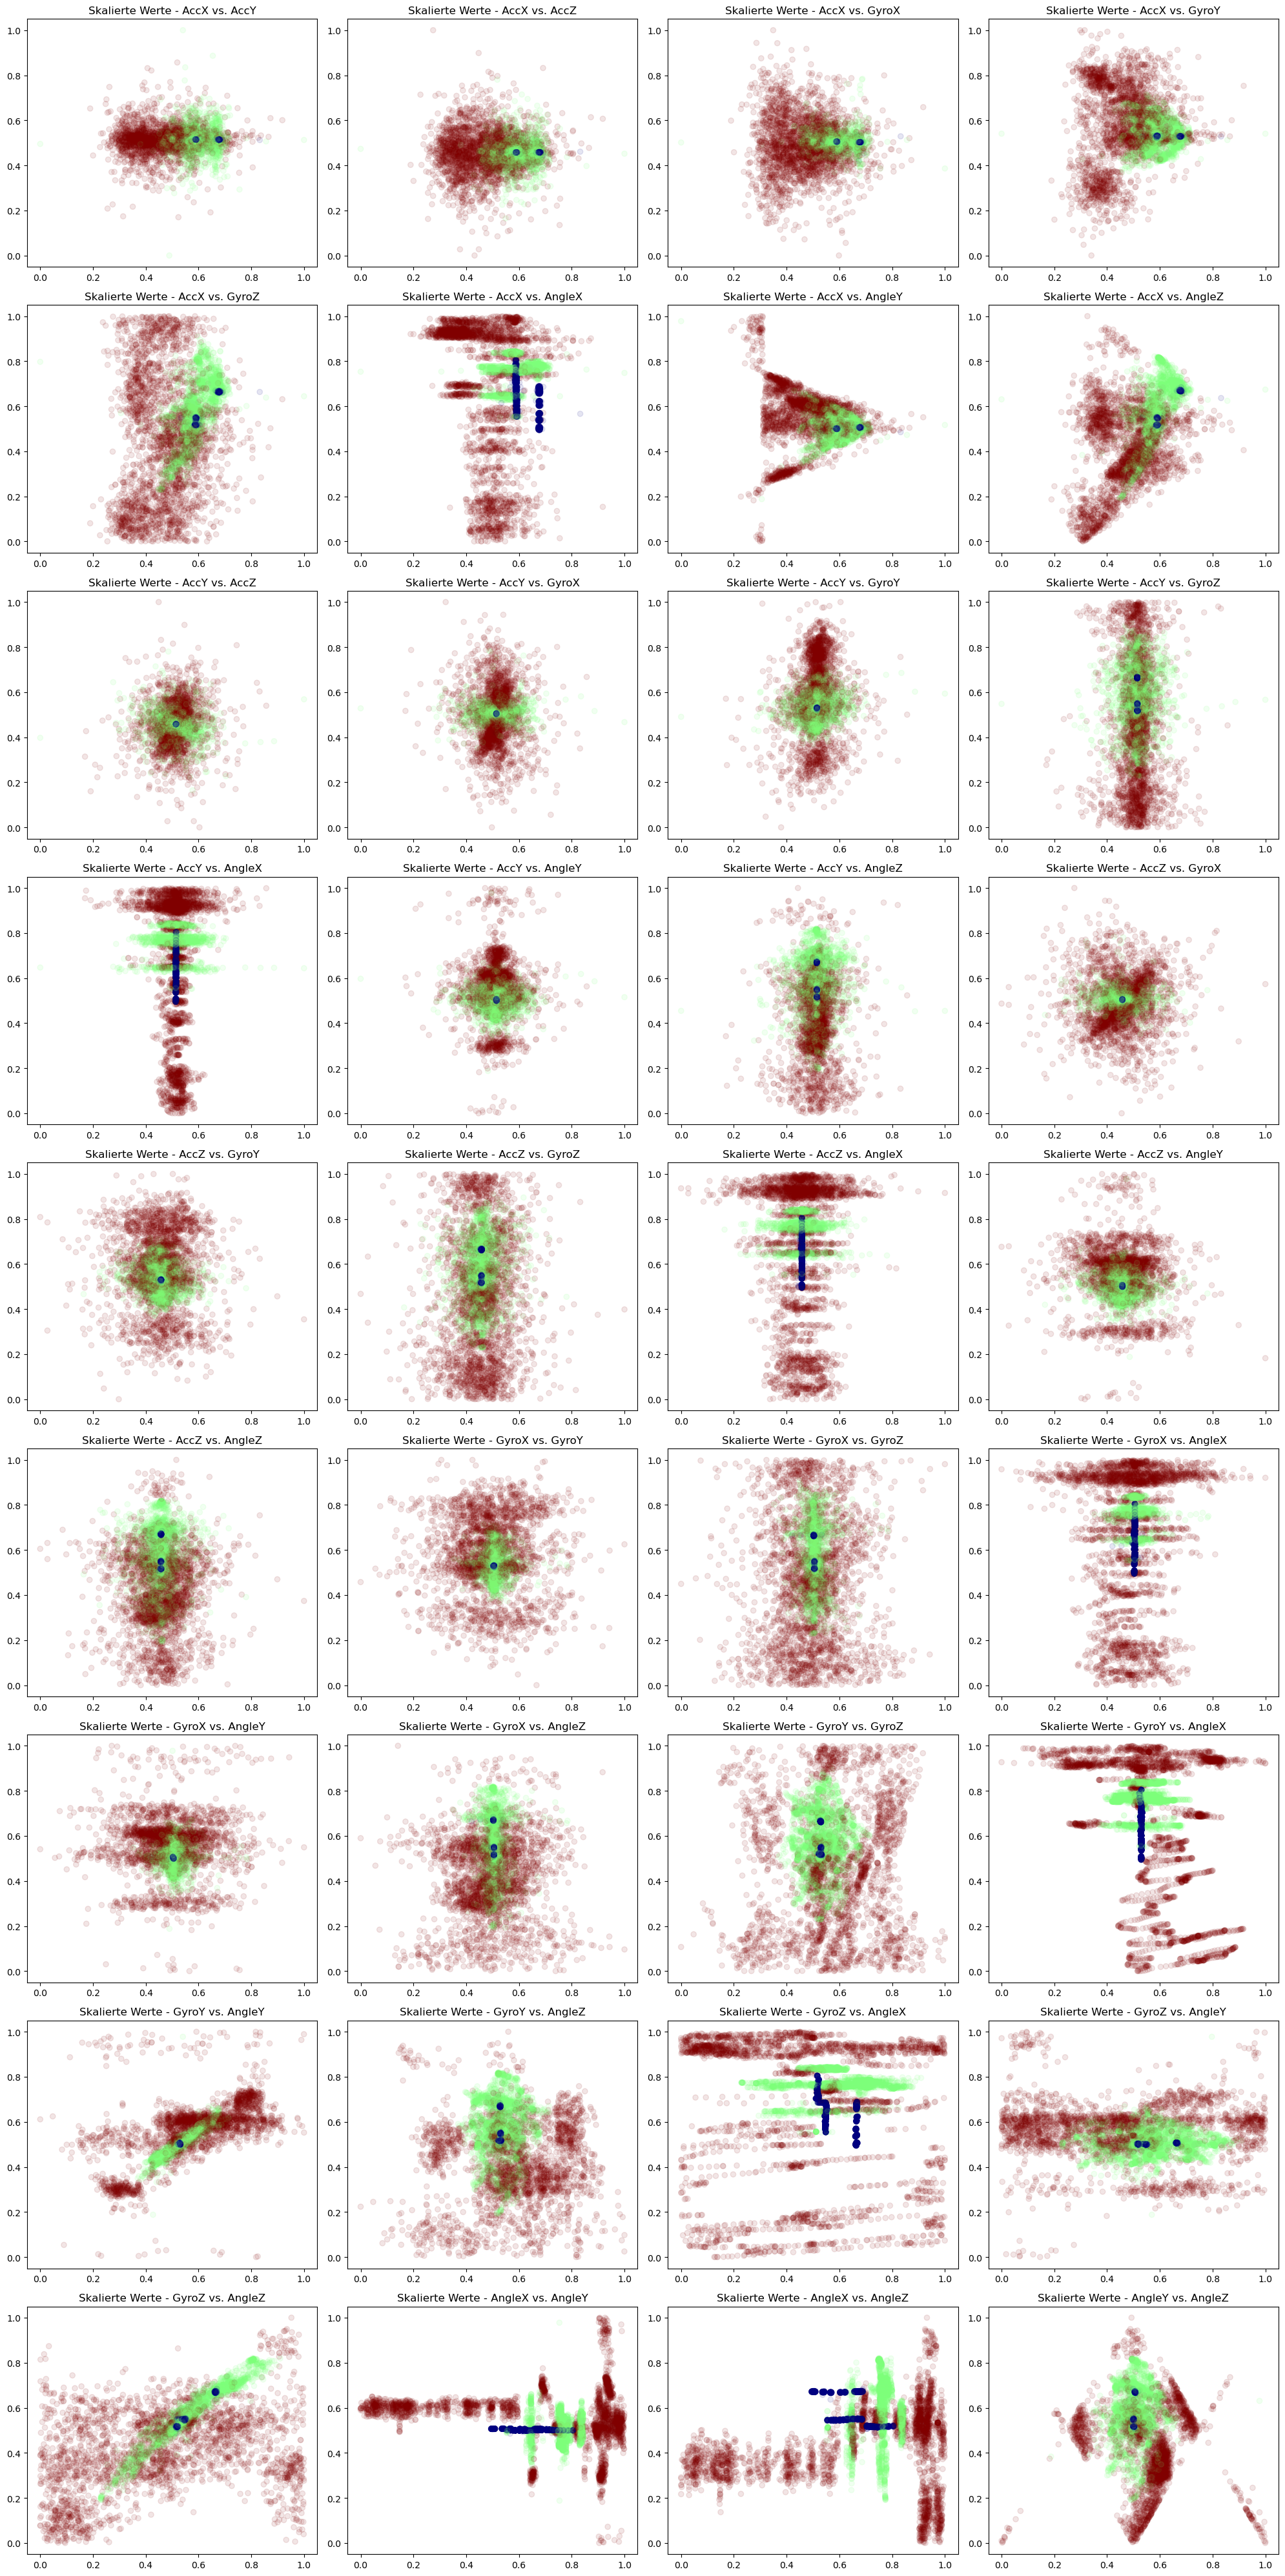

In [87]:
from itertools import combinations

# Annahme: 'data' ist dein ursprüngliches DataFrame mit den Daten

# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Liste aller Labels
all_labels = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

# Erstelle alle möglichen Kombinationen von Label-Paaren
label_pairs = list(combinations(all_labels[0:9], 2))
print(len(label_pairs))

# Anzahl der Zeilen und Spalten für die Subplots
num_rows = 9  # Du kannst dies anpassen, um die Anzahl der gewünschten Zeilen zu ändern
num_cols = 4  # Du kannst dies anpassen, um die Anzahl der gewünschten Spalten zu ändern

# Erstelle Subplots
#plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Iteriere durch Label-Paare und erstelle Scatterplots
for i in range(num_rows):
    for j in range(num_cols):
        label_pair = label_pairs[i * num_cols + j]
        axs[i, j].scatter(data_scaled_df[label_pair[0]], data_scaled_df[label_pair[1]], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
        axs[i, j].set_title(f'Skalierte Werte - {label_pair[0]} vs. {label_pair[1]}')

# Verbessere das Layout
plt.tight_layout()
plt.show()


# 15. Vorverarbeitung

In [ ]:
#

# 16. Training des kNN

In [88]:
from sklearn import neighbors
import numpy as np

num_features = 14
X = np.zeros([len(data_scaled_df), num_features])
y = data_scaled_df['class']

k = 15
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
features = data_scaled_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')
clf.fit(features, y)

KNeighborsClassifier(n_neighbors=15)

# 17. Prediction

In [89]:
#Prediction mit Test-Array
y_predict = clf.predict(features)

acc = np.mean(y_predict == (data_scaled_df['class']).astype(int).values)
acc

0.9895224171539961

In [90]:
y_predict

array([2, 1, 1, ..., 2, 3, 1])

In [22]:
# Prediction mit Validation-Array

# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
val_df = pd.DataFrame(val, columns=data.columns)

# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
val_df['class'] = val_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

val_labels = val_df['class']
val_data = val_df.drop(columns='RuheState').drop(columns='class').drop(columns='TranspState').drop(columns='FernstState')

# Prediction
prediction = clf.predict(val_data)

acc = np.mean(prediction == val_labels.astype(int).values)
acc

0.9835526315789473

# Python MQTT Client

In [117]:
live_data = {'AccX' :[],
        'AccY' : [],
        'AccZ' : [],
        'GyroX' : [],
        'GyroY' : [],
        'GyroZ' : [],
        'AngleX' : [],
        'AngleY' : [],
        'AngleZ' : [],     
        'RuheState' : 0,
        'FernstState' : 0,
        'TranspState' : 0,}

live_data_df = pd.DataFrame(live_data)


live_data_df.describe()

AccX  AccY  AccZ  GyroX  GyroY  GyroZ  AngleX  AngleY  AngleZ  \
count   0.0   0.0   0.0    0.0    0.0    0.0     0.0     0.0     0.0   
mean    NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
std     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
min     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
25%     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
50%     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
75%     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   
max     NaN   NaN   NaN    NaN    NaN    NaN     NaN     NaN     NaN   

       RuheState  FernstState  TranspState  
count        0.0          0.0          0.0  
mean         NaN          NaN          NaN  
std          NaN          NaN          NaN  
min          NaN          NaN          NaN  
25%          NaN          NaN          NaN  
50%          NaN          NaN          NaN  
75%          NaN          NaN          NaN  
max          NaN          NaN          NaN

In [121]:
import paho.mqtt.client as mqtt


live_data_df = pd.DataFrame(live_data)

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    # client.subscribe("$SYS/#")

# The callback for when a PUBLISH message is received from the server.
counter = 0 # counts how many times angleZ is received 

def on_message(client, userdata, msg):
    # print(msg.topic+" "+str(msg.payload))
    global accX, accY, accZ, gyroX, gyroY, gyroZ, angleX, angleY, angleZ, live_data_df
    global counter
    if(msg.topic == 'accelerationX'):
        accX = msg.payload.decode('UTF-8')
        #print(accX)
    elif(msg.topic == 'accelerationY'):
        accY = msg.payload.decode('UTF-8')
    elif(msg.topic == 'accelerationZ'):
        accZ = msg.payload.decode('UTF-8')
    
    elif(msg.topic == 'gyrometerX'):
        gyroX = msg.payload.decode('UTF-8')
    elif(msg.topic == 'gyrometerY'):
        gyroY = msg.payload.decode('UTF-8')
    elif(msg.topic == 'gyrometerZ'):
        gyroZ = msg.payload.decode('UTF-8')

    elif(msg.topic == 'angleX'):
        angleX = msg.payload.decode('UTF-8')
    elif(msg.topic == 'angleY'):
        angleY = msg.payload.decode('UTF-8')
    elif(msg.topic == 'angleZ'):
        angleZ = msg.payload.decode('UTF-8')
        counter += 1

        new_row = {'AccX' :[accX],
        'AccY' : [accY],
        'AccZ' : [accZ],
        'GyroX' : [gyroX],
        'GyroY' : [gyroY],
        'GyroZ' : [gyroZ],
        'AngleX' : [angleX],
        'AngleY' : [angleY],
        'AngleZ' : [angleZ],
        'RuheState' : 0,
        'FernstState' : 0,
        'TranspState' : 0,
        }
        
        # convert new Data to DataFrame
        new_row = pd.DataFrame(new_row)

        live_data_df = pd.concat([live_data_df, new_row], ignore_index=True)

        if counter == 30:
            counter = 0
            live_data_scaled = pd.DataFrame(scaler.transform(live_data_df), columns=data.columns)
            live_data_scaled = live_data_scaled.drop(columns='RuheState').drop(columns='TranspState').drop(columns='FernstState')
            live_predict = clf.predict(live_data_scaled)
            print(live_data_scaled)
            print(live_predict)
            # Reset live_predict and live_data_df
            live_predict = None
            live_data_df = pd.DataFrame(columns=live_data_df.columns)

    
    

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("192.168.178.22", 1883, 60)
client.subscribe("ESP_message", 0)
client.subscribe("accelerationX", 0)
client.subscribe("accelerationY", 0)
client.subscribe("accelerationZ", 0)
client.subscribe("gyrometerX", 0)
client.subscribe("gyrometerY", 0)
client.subscribe("gyrometerZ", 0)
client.subscribe("angleX", 0)
client.subscribe("angleY", 0)
client.subscribe("angleZ", 0)


# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

        AccX      AccY      AccZ     GyroX     GyroY     GyroZ    AngleX  \
0   0.165242  0.514320  0.459091  0.496480  0.454165  0.489539  0.974024   
1   0.175297  0.514359  0.458983  0.513792  0.612265  0.452716  0.974181   
2   0.193833  0.514059  0.459930  0.666256  0.106840  0.027809  0.977579   
3   0.243082  0.514352  0.458939  1.180611  0.096045 -0.214255  0.992323   
4   0.141507  0.515024  0.457323  0.431289  0.864639  0.636406  0.991323   
5   0.248896  0.514543  0.458353 -0.184223  0.926890  1.496061  0.975980   
6   0.274820  0.514053  0.460294  0.293423  0.689403  0.104001  0.971153   
7   0.207514  0.513876  0.459706  0.928904  0.078144 -0.874352  0.980320   
8   0.051150  0.514448  0.458617  0.956700  0.537555 -0.019110  0.990115   
9   0.165721  0.514765  0.458012  0.402151  0.953967  2.028975  0.987787   
10  0.314424  0.514733  0.458888  0.489824  0.295525  1.077433  0.987335   
11  0.391853  0.514327  0.458581  0.003950  0.967820 -0.189565  0.976024   
12  0.154093

KeyboardInterrupt: 